In [1]:
import pandas as pd, numpy as np, cv2, matplotlib.pyplot as plt
from xml.etree.ElementTree import Element, SubElement, ElementTree

In [2]:
label_data = pd.read_csv('../label_20220105.csv')

In [3]:
label_data

,Unnamed: 0,ID,Nasion_y,Nasion_x,Sella_y,Sella_x,Porion_y,Porion_x,Orbitale_y,Orbitale_x,...,Soft tissue b point_y,Soft tissue b point_x,Soft tissue pogonion_y,Soft tissue pogonion_x,Soft tissue Gnathion_y,Soft tissue Gnathion_x,Soft tissue Menton_y,Soft tissue Menton_x,Cervical point_y,Cervical point_x
0,0,S0000,0.289137,0.645367,0.340256,0.400958,0.416933,0.329073,0.405751,0.605431,...,0.675719,0.709265,0.723642,0.706070,0.768371,0.682109,0.793930,0.642173,0.829073,0.525559
1,1,S0001,0.284345,0.746006,0.343450,0.511182,0.408946,0.432907,0.386581,0.720447,...,0.664537,0.811502,0.710863,0.801917,0.755591,0.773163,0.773163,0.728435,0.765176,0.638978
2,2,S0002,0.305112,0.774760,0.343450,0.527157,0.420128,0.440895,0.405751,0.742812,...,0.694888,0.811502,0.744409,0.822684,0.784345,0.795527,0.809904,0.749201,0.827476,0.645367
3,3,S0003,0.314696,0.694888,0.343450,0.437700,0.416933,0.337061,0.431310,0.662939,...,0.710863,0.720447,0.752396,0.710863,0.793930,0.682109,0.824281,0.629393,0.861022,0.507987
4,4,S0004,0.230032,0.648562,0.298722,0.394569,0.392971,0.324281,0.357827,0.611821,...,0.627796,0.698083,0.683706,0.722045,0.739617,0.706070,0.753994,0.651757,0.766773,0.523962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,645,S0645,0.341853,0.843450,0.351438,0.594249,0.416933,0.493610,0.445687,0.800319,...,0.718850,0.848243,0.768371,0.849840,0.806709,0.827476,0.827476,0.779553,0.824281,0.659744
646,646,S0646,0.300319,0.813099,0.351438,0.563898,0.439297,0.477636,0.418530,0.781150,...,0.723642,0.837061,0.771565,0.837061,0.809904,0.808307,0.829073,0.769968,0.846645,0.683706
647,647,S0647,0.300319,0.833866,0.345048,0.576677,0.418530,0.484026,0.408946,0.800319,...,0.702875,0.869010,0.746006,0.867412,0.781150,0.845048,0.801917,0.801917,0.822684,0.677316
648,648,S0648,0.327476,0.861022,0.340256,0.591054,0.428115,0.495208,0.444089,0.814696,...,0.744409,0.876997,0.793930,0.880192,0.840256,0.856230,0.859425,0.809904,0.848243,0.666134


In [4]:
len(label_data['ID'])

650

In [5]:
label_data['ID'][0]

'S0000'

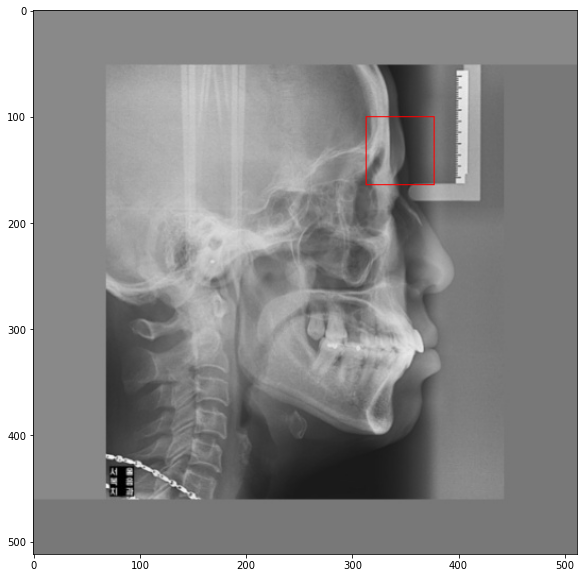

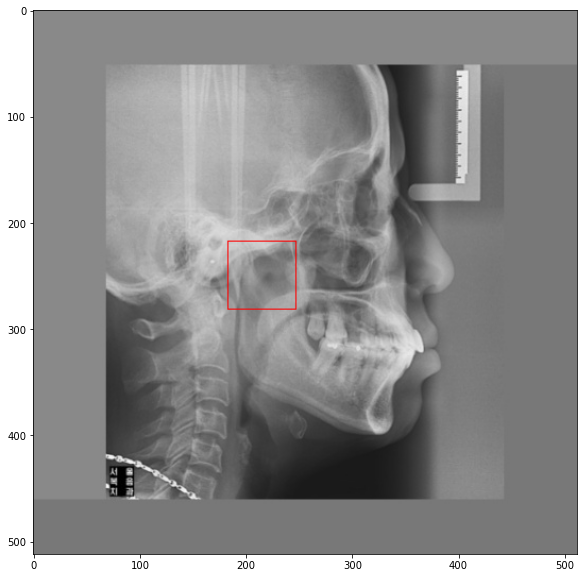

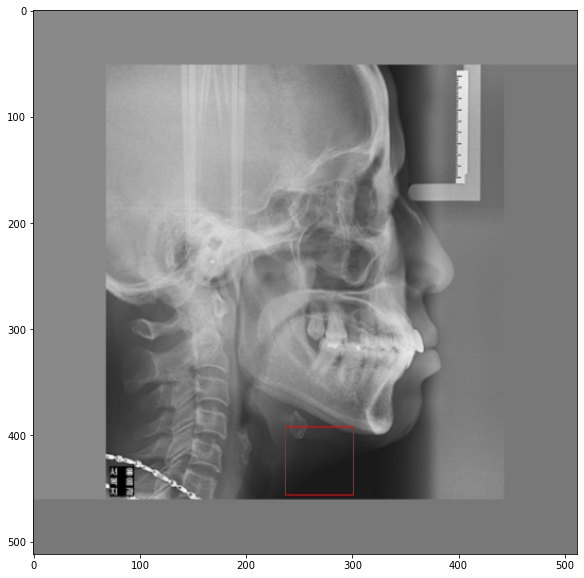

In [9]:
def ck_bound (a,imax=511) :
    #print(type(a))
    a = max(0.,a)
    a = min(imax,a)
    a = round(a)
    
    a = int(a)
    return a

len_file = len(label_data['ID'])

bbox_size = 32
    
for i in range(len_file):
    root = Element("annotation")

    element1 = Element("filename")
    root.append(element1)
    element1.text = label_data.iloc[i]['ID']


    element2 = Element("size")
    root.append(element2)
    
    sub_element2 = SubElement(element2, "width")
    sub_element2.text = '512'
    sub_element2 = SubElement(element2, "height")
    sub_element2.text = '512'
    sub_element2 = SubElement(element2, "depth")
    sub_element2.text = '3'


    # landmark_name = ['Glabella', 'R3', 'Naison']
    landmark_name = ['Glabella', 'R3', 'Cervical point', 'Go-2 Ramus down', 'Naison', 'Pogonion']
    
    for j in range(3):
        element3 = Element("object")
        root.append(element3)
        sub_element3 = SubElement(element3, "name")
        sub_element3.text = landmark_name[j]
        
        x_loc = label_data.iloc[i][landmark_name[j]+'_x']
        y_loc = label_data.iloc[i][landmark_name[j]+'_y']
        
        
        tmp = np.array([x_loc*512.-bbox_size, x_loc*512.+bbox_size, y_loc*512.-bbox_size, y_loc*512.+bbox_size]).astype(int)
        
        if i==0:
            image = cv2.imread('../../../Centernet/ceph/output/S0000.jpg')
            image_2 = cv2.rectangle(image, (tmp[0], tmp[2]), (tmp[1], tmp[3]), [255, 0, 0], 1)
            
            plt.figure(figsize=(10, 10))
            plt.imshow(image_2)
        
        for idx,c in enumerate(tmp):
            tmp[idx] = ck_bound(c)
            


        sub_element4 = SubElement(element3, "bndbox")

        sub_element5 = SubElement(sub_element4, "xmin")
        sub_element5.text = str(tmp[0])

        sub_element6 = SubElement(sub_element4, "ymin")
        sub_element6.text = str(tmp[2])

        sub_element7 = SubElement(sub_element4, "xmax")
        sub_element7.text = str(tmp[1])

        sub_element8 = SubElement(sub_element4, "ymax")
        sub_element8.text = str(tmp[3])
        
    
    tree = ElementTree(root)
    
    #i_2 = '{0:04d}'.format(i)
    i_2 = label_data['ID'][i]
    fileName = f"./output/{i_2}.xml"
    with open(fileName, "wb") as file:
        tree.write(file, encoding='utf-8', xml_declaration=True)

In [6]:
a = np.array([-1, 2, 255, 34])

#a = np.max(0, a)
a.max

<function ndarray.max>

In [24]:
import cv2

image = cv2.imread('../../../Centernet/ceph/output/S0000.jpg')

In [25]:
image.shape

(512, 512, 3)

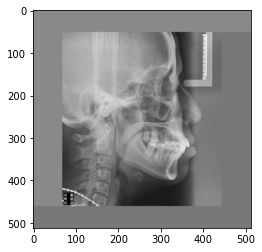

In [26]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [39]:
fp_train = open('./train.txt','wt')
fp_val = open('./val.txt','wt')
for idx,c in enumerate(label_data['ID']):
    if idx < 550:
        fp_train.write(f'{c}\n')
    elif idx < 600:
        fp_val.write(f'{c}\n')
    
fp_train.close()    
fp_val.close()

In [43]:
fp_test = open('./test.txt','wt')

for idx,c in enumerate(label_data['ID']):
    if idx >= 600:
        fp_test.write(f'{c}\n')
    
fp_test.close()    